Entity,Code,Year,Share of global cumulative COâ‚‚ emissions (%)
Afghanistan,AFG,1751,0
Afghanistan,AFG,1752,0
Afghanistan,AFG,1753,0
Afghanistan,AFG,1754,0


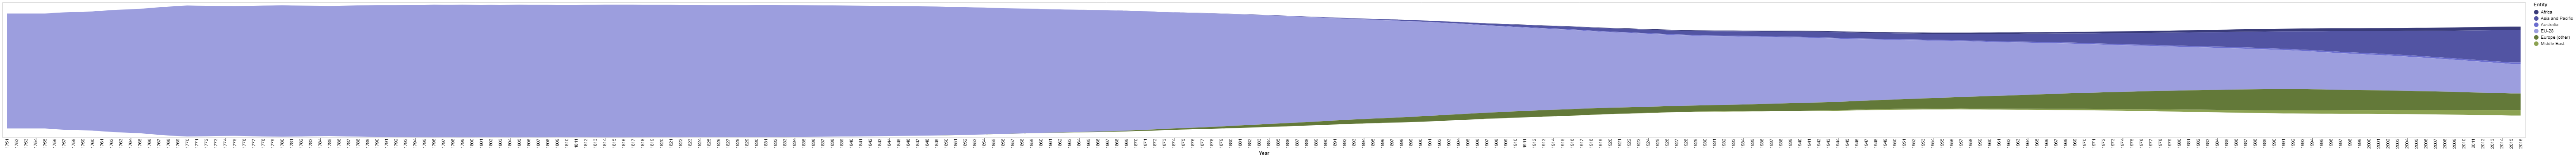

In [72]:
import pandas as pd
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')
with open('C:/Users/sulem/Desktop/pyton mach/share-of-cumulative-co2.csv') as fid:
    for idx, row in enumerate(fid):
        print(row,end='')
        if idx >= 4:
            break
            
#importing all date            
df = pd.read_csv('C:/Users/sulem/Desktop/pyton mach/share-of-cumulative-co2.csv') # read in the csv file   
df_sector = pd.read_csv('C:/Users/sulem/Desktop/pyton mach/global-carbon-dioxide-emissions-by-sector-gg-co.csv') # read in the csv file   
df_GDP = pd.read_csv('C:/Users/sulem/Desktop/pyton mach/co-emissions-per-capita-vs-gdp-per-capita-international-.csv') # read in the csv file
df.describe() 
df_grouped = df.groupby(by=['Entity'])

#filter the data to show only continents
contant =['Africa',' Americas','Asia and Pacific','Australia','EU-28','Europe (other)','Middle East']
contants =['Africa','Americas','Asia','Australia','Europe']  
contantg =['Africa',' Americas','Asia and Pacific','Australia','EU-28','Europe (other)','Middle East']
contantA =['Afghanistan']
#

dfset= df[df.Entity.isin(contant)]
dfsets= df_sector[df_sector.Entity.isin(contants)]
dfsetg= df_GDP[df_GDP.Entity.isin(contantA )]
source=dfset
sources=dfsets
sourceg=dfsetg
sourceg
df_grouped = dfsets.groupby(by=['Entity'])
df_grouped


# show industry with time 
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

df_nodup=df.drop_duplicates('Entity')
df_nodup.Entity
#source = df.tail(5000)


alt.Chart(sources).mark_area().encode(
    x="Year:N",
    y=alt.Y("Industry", stack="normalize"),
    color="Entity:N"
)


# show co2 emm with time 
import altair as alt
from vega_datasets import data

#source = df
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(source).mark_area().encode(
    alt.X('Year:N',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y("Share of global cumulative CO₂ emissions (%):Q", stack='center', axis=None),
    alt.Color('Entity:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()


<bound method NDFrame.head of            Entity  Year    Transport    Forestry       Energy  Other sources  \
0     Afghanistan  1990     607.2770      0.0000     277.4122              0   
1     Afghanistan  1991     531.4588      0.0000     270.1278              0   
2     Afghanistan  1992     376.1294      0.0000     154.5804              0   
3     Afghanistan  1993     323.7141      0.0000     151.7126              0   
4     Afghanistan  1994     310.3998      0.0000     146.3426              0   
5     Afghanistan  1995     310.7176      0.0000     119.5816              0   
6     Afghanistan  1996     305.0527      0.0000     111.9971              0   
7     Afghanistan  1997     304.4594      0.0000      95.4765              0   
8     Afghanistan  1998     291.3629      0.0000      91.6882              0   
9     Afghanistan  1999     280.7938      0.0000     101.8636              0   
10    Afghanistan  2000     269.1700      0.0000      96.7000              0   
11    Afgh

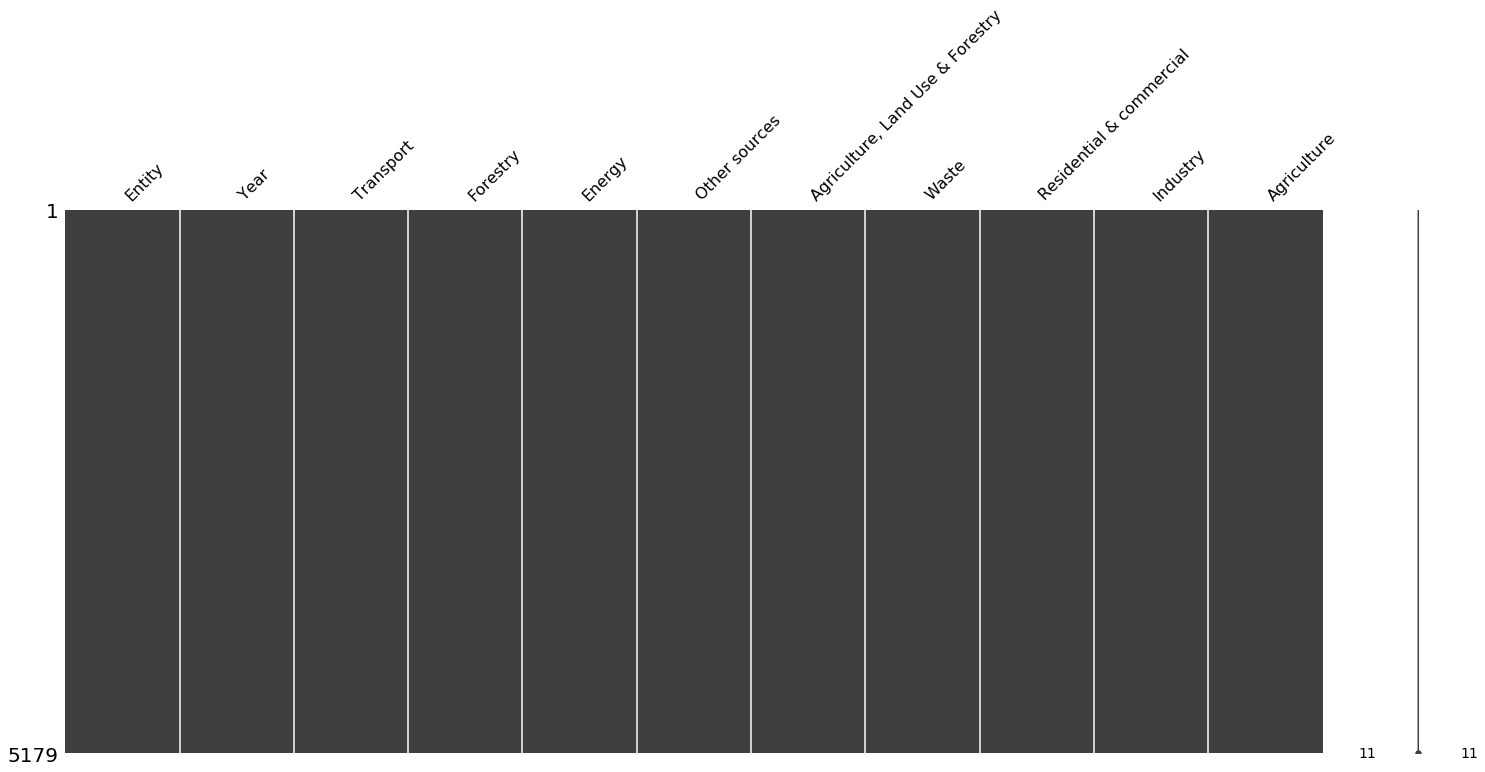

In [15]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn
del df_sector['Code']
df_sector.dropna(inplace=True)
#mn.matrix(df.sort_values(by=["Cabin","Embarked","Age",]))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in df_sector.columns if df_sector[c].dtype in numerics]:
    df_sector[c] = df_sector[c].abs()
    
mn.matrix(df_sector)
df_sector.head

<bound method NDFrame.head of           Entity Code  Year  Per capita CO₂ emissions (tonnes per capita)  \
747    Argentina  ARG  1959                                         2.414   
748    Argentina  ARG  1960                                         2.366   
749    Argentina  ARG  1961                                         2.441   
750    Argentina  ARG  1962                                         2.520   
751    Argentina  ARG  1963                                         2.314   
752    Argentina  ARG  1964                                         2.536   
753    Argentina  ARG  1965                                         2.640   
754    Argentina  ARG  1966                                         2.791   
755    Argentina  ARG  1967                                         2.856   
756    Argentina  ARG  1968                                         2.968   
757    Argentina  ARG  1969                                         3.273   
758    Argentina  ARG  1970                   

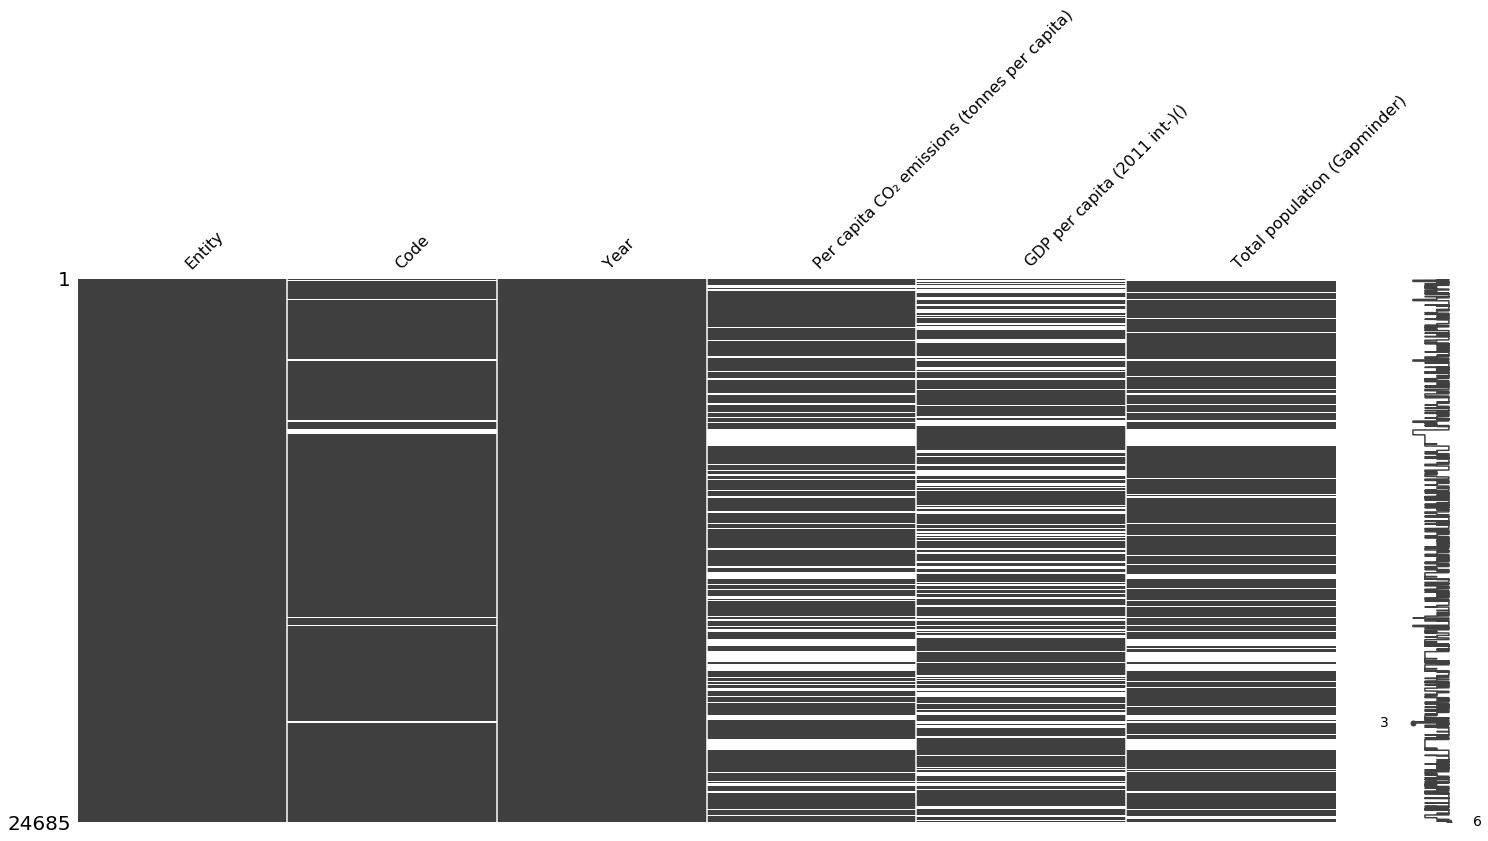

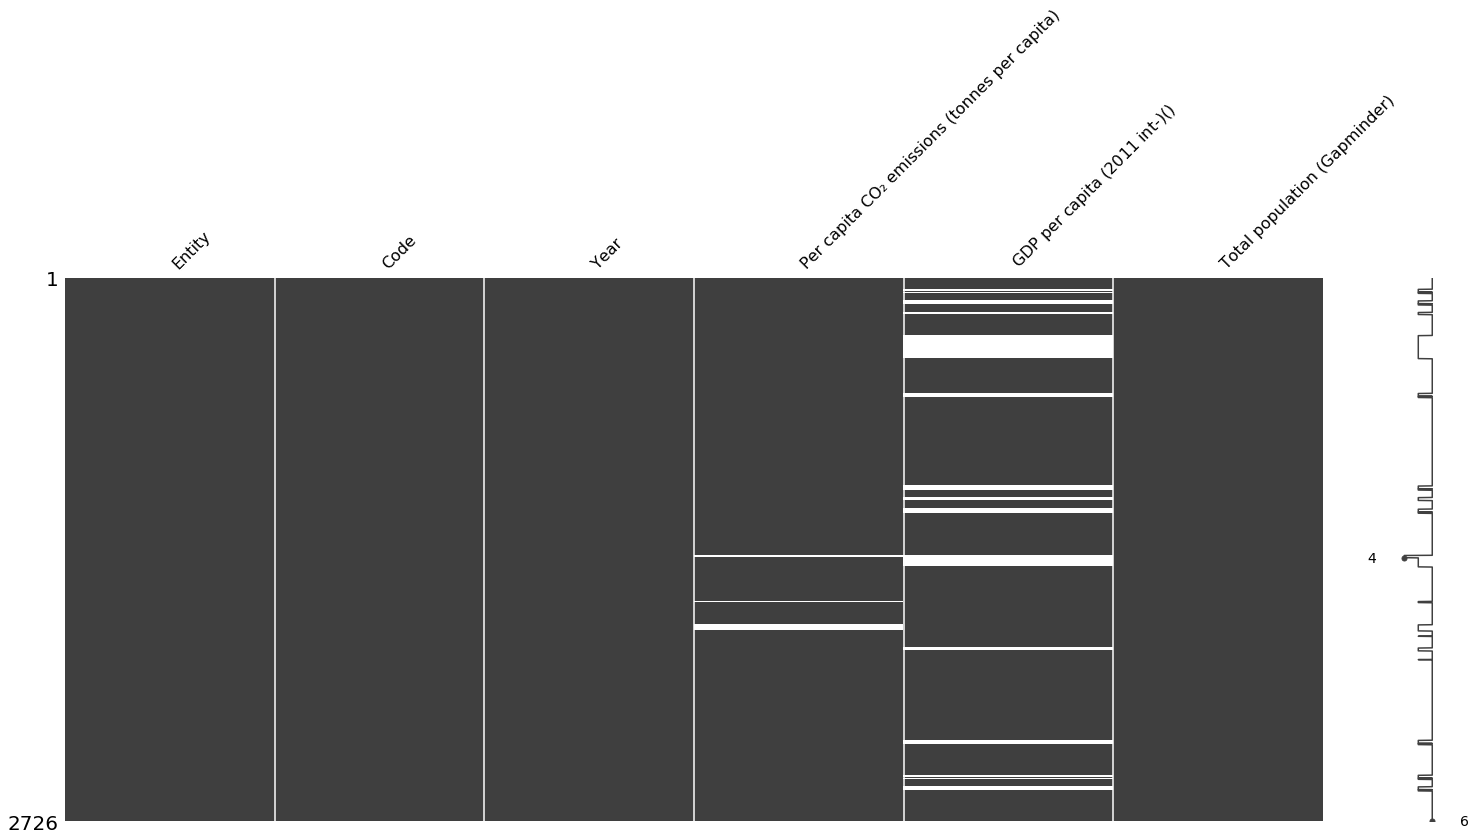

In [68]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
import missingno as mn
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

mn.matrix(df_GDP)
with open("C:/Users/sulem/Desktop/pyton mach/Africa.txt", "r") as ins:  
    Africa = []
    for line in ins:
        if len(line) >2:
         Africa.append(line.rstrip('\n'))
        
with open("C:/Users/sulem/Desktop/pyton mach/Asia.txt", "r") as ins: 
    Asia = []
    for line in ins:
        if len(line) >2:
         Asia.append(line.rstrip('\n'))        
        
with open("C:/Users/sulem/Desktop/pyton mach/Europe.txt", "r") as ins:  
    Europe = []
    for line in ins:
        if len(line) >2:
         Europe.append(line.rstrip('\n'))

        
with open("C:/Users/sulem/Desktop/pyton mach/north america.txt", "r") as ins:  
    north_america = []
    for line in ins:
        if len(line) >2:
         north_america.append(line.rstrip('\n'))
        
with open("C:/Users/sulem/Desktop/pyton mach/south america.txt", "r") as ins:  
    south_america = []
    for line in ins:
        if len(line) >2:
         south_america.append(line.rstrip('\n'))
        
con=len(Africa)+len(Asia)+len(Europe)+len(north_america)+len(south_america)
        
#rint(con)
#lines = [line.rstrip('\n') for line in open('filename')]
df_GDPAF=df_GDP[df_GDP.Entity.isin(Africa)]
df_GDPAF=df_GDPAF[df_GDPAF['Year']>=1959]
df_GDPAF_m=df_GDPAF['Total population (Gapminder)'].fillna(method='ffill')


df_GDPAS=df_GDP[df_GDP.Entity.isin(Asia)]
df_GDPAS=df_GDPAS[df_GDPAS['Year']>=1959]
df_GDPAS_m=df_GDPAS['Total population (Gapminder)'].fillna(method='ffill')
df_GDPAS['Total population (Gapminder)']=df_GDPAS_m

df_GDPER=df_GDP[df_GDP.Entity.isin(Europe)]
df_GDPER=df_GDPER[df_GDPER['Year']>=1959]
df_GDPER_m=df_GDPER['Total population (Gapminder)'].fillna(method='ffill')
df_GDPER['Total population (Gapminder)']=df_GDPER_m

df_GDPNA=df_GDP[df_GDP.Entity.isin(north_america)]
df_GDPNA=df_GDPNA[df_GDPNA['Year']>=1959]
df_GDPNA_m=df_GDPNA['Total population (Gapminder)'].fillna(method='ffill')
df_GDPNA['Total population (Gapminder)']=df_GDPNA_m

df_GDPSA=df_GDP[df_GDP.Entity.isin(south_america)]
df_GDPSA=df_GDPSA[df_GDPSA['Year']>=1959]
df_GDPSA_m=df_GDPSA['Total population (Gapminder)'].fillna(method='ffill')
df_GDPSA['Total population (Gapminder)']=df_GDPSA_m

mn.matrix(df_GDPAS)
df_GDPSA.head

In [71]:
df_GDPAS_grouped = df_GDPAS.groupby(by=['Year'])
df_AS=df_GDPAS_grouped.mean()
df_AS
df_GDPAF_grouped = df_GDPAF.groupby(by=['Year'])
df_AF=df_GDPAF_grouped.std()
df_AF

,Per capita CO₂ emissions (tonnes per capita),GDP per capita (2011 int-$) ($),Total population (Gapminder)
Year,,,
1959,0.851293,1885.565421,7.954622e+06
1960,0.849079,1997.257200,8.137917e+06
1961,0.850149,2123.937134,8.327987e+06
1962,0.850643,2279.257961,8.524768e+06
1963,0.850881,2536.519010,8.727865e+06
1964,0.893763,2935.444330,8.936693e+06
1965,0.939022,3317.384335,9.150934e+06
1966,0.931463,3627.224075,9.370500e+06
1967,1.660792,3823.282382,9.595878e+06
